In [1]:
import time
import numpy as np
import pandas as pd
from tensorflow import *
import keras
from pandas import DataFrame
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Dense, Dropout, Lambda, Conv1D, Flatten ,MaxPooling1D,AveragePooling1D
# from keras.optimizers import RMSprop
from keras.callbacks import TensorBoard
# from keras.utils import to_categorical
# from keras.layers.normalization import BatchNormalization

# from sklearn.model_selection import train_test_split
import tensorflow as tf
import gc
gc.collect()
from tensorflow.keras import *

import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.callbacks import ModelCheckpoint
import pickle

In [2]:
# import numpy as np
# import pandas as pd
# from pandas import DataFrame
# import matplotlib.pyplot as plt
# %matplotlib inline
# from tensorflow.keras.utils import to_categorical
# import keras
# from keras import layers
# from keras.callbacks import ModelCheckpoint
# from keras.models import load_model

In [3]:
# import numpy as np
# import pandas as pd
# from pandas import DataFrame
# import keras.backend as K
# from keras.models import Sequential, Model
# from keras.layers import Input, Dense, Dropout, Lambda, Conv1D, MaxPooling1D,AveragePooling1D
# # from keras.optimizers import RMSprop
# from keras.callbacks import TensorBoard
# # from keras.utils import to_categorical,plot_model
# import keras 
# from keras.layers import Dense, MaxPooling1D, Convolution1D, Dropout, Input, Flatten, Subtract, merge, BatchNormalization
# # from keras.layers.normalization import BatchNormalization
# from keras.models import Model

# from keras.callbacks import ModelCheckpoint
# from keras.models import load_model

In [4]:
trace_1 = np.load('F:/duochidu/STM32_random_key/2020.12.18-19.55.37_traces.npy')[:, 800: 950]
trace_2 = np.load('F:/duochidu/STM32_First_round/STM32_board1_fixedkey_test/2020.12.16-15.04.00_traces.npy')[:, 800: 950]
traces_1 = np.vstack((trace_1,trace_2)).reshape(-1, 150, 1)#将两个trace按垂直方向叠加

labels_1 = np.load('F:/duochidu/gai/STM32_labels_100k.npy')#train
labels_2 = np.load('F:/duochidu/gai/STM32_labels_20000.npy')#test

In [5]:
x_train_a = traces_1[0:90000]
y_train = labels_1[0,:90000]

x_val_a = traces_1[90000:100000]
y_val = labels_1[0,90000:100000]

x_test_a = traces_1[100000:]
y_test = labels_2[0]

In [6]:
inp_1 = Input(shape=(150,1))

In [7]:
a_1 = Conv1D(filters=8,
             kernel_size=1,
             strides=1,
             padding='same',
             activation='relu')(inp_1)

In [8]:
b_1 = Conv1D(filters=8,
             kernel_size=1,
             strides=1,
             padding='same',
             activation='relu')(inp_1)
b_2 = Conv1D(filters=16,
             kernel_size=3,
             strides=1,
             padding='same',
             activation='relu')(b_1)

In [9]:
c_1 = Conv1D(filters=8,
             kernel_size=1,
             strides=1,
             padding='same',
             activation='relu')(inp_1)
c_2 = Conv1D(filters=16,
             kernel_size=5,
             strides=1,
             padding='same',
             activation='relu')(c_1)

In [10]:
d_1 = MaxPooling1D(pool_size=3, strides=1, padding='same')(inp_1)
d_2 = Conv1D(filters=16,
             kernel_size=1,
             strides=1,
             padding='same',
             activation='relu')(d_1)

In [11]:
Merge = keras.layers.concatenate([a_1, b_2, c_2, d_2], axis=2)

In [12]:
e_1 = Conv1D(filters=32,
             kernel_size=7,
             activation='relu',
             padding='same')(Merge)

e_2 = AveragePooling1D(pool_size=2, strides=2)(e_1)

FL = Flatten()(e_2)

ds_1 = Dense(128, activation='relu')(FL)
ds_2 = Dense(256, activation='relu')(ds_1)

out = Dense(256, activation='softmax')(ds_2)

In [13]:
model = Model(inputs=inp_1, outputs=out)

In [14]:

# from tensorflow.keras.utils.vis_untils import plot_model

In [15]:
plot_model(model, show_shapes=True)

NameError: name 'plot_model' is not defined

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0005),
              loss='categorical_crossentropy',
              metrics=['acc'])

filepath = "F:/duochidu/gpu -300ep/model/t2_RMSprop.33333.h5"
# 中途训练效果提升, 则将文件保存, 每提升一次, 保存一次
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,mode='max')
callbacks_list = [checkpoint]

F:\anaconda\envs\gpu_nb\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [19]:
start = time.time()

history = model.fit(x_train_a, tf.keras.utils.to_categorical(y_train, num_classes=256),
                    epochs=300,
                    batch_size=256,
                    callbacks=callbacks_list,
                    validation_data = (x_val_a, tf.keras.utils.to_categorical(y_val, num_classes=256)),
                    verbose=1)

end = time.time()
total_time = end-start

Epoch 1/300
352/352 [==============================] - 11s 13ms/step - loss: 5.5452 - acc: 0.0037 - val_loss: 5.5436 - val_acc: 0.0043

Epoch 00001: val_acc improved from -inf to 0.00430, saving model to F:/duochidu/gpu -300ep/model\t2_RMSprop.33333.h5
Epoch 2/300
352/352 [==============================] - 4s 11ms/step - loss: 5.2374 - acc: 0.0127 - val_loss: 4.9240 - val_acc: 0.0210

Epoch 00002: val_acc improved from 0.00430 to 0.02100, saving model to F:/duochidu/gpu -300ep/model\t2_RMSprop.33333.h5
Epoch 3/300
352/352 [==============================] - 4s 11ms/step - loss: 4.6732 - acc: 0.0327 - val_loss: 4.3445 - val_acc: 0.0510

Epoch 00003: val_acc improved from 0.02100 to 0.05100, saving model to F:/duochidu/gpu -300ep/model\t2_RMSprop.33333.h5
Epoch 4/300
352/352 [==============================] - 5s 13ms/step - loss: 4.2794 - acc: 0.0514 - val_loss: 4.2144 - val_acc: 0.0500

Epoch 00004: val_acc did not improve from 0.05100
Epoch 5/300
352/352 [==============================]


Epoch 00037: val_acc did not improve from 0.34340
Epoch 38/300
352/352 [==============================] - 4s 11ms/step - loss: 2.0331 - acc: 0.3521 - val_loss: 1.8344 - val_acc: 0.4013

Epoch 00038: val_acc improved from 0.34340 to 0.40130, saving model to F:/duochidu/gpu -300ep/model\t2_RMSprop.33333.h5
Epoch 39/300
352/352 [==============================] - 4s 11ms/step - loss: 2.0083 - acc: 0.3565 - val_loss: 2.4005 - val_acc: 0.2652

Epoch 00039: val_acc did not improve from 0.40130
Epoch 40/300
352/352 [==============================] - 4s 10ms/step - loss: 1.9875 - acc: 0.3624 - val_loss: 1.8490 - val_acc: 0.3998

Epoch 00040: val_acc did not improve from 0.40130
Epoch 41/300
352/352 [==============================] - 4s 11ms/step - loss: 1.9646 - acc: 0.3692 - val_loss: 2.1145 - val_acc: 0.3276

Epoch 00041: val_acc did not improve from 0.40130
Epoch 42/300
352/352 [==============================] - 4s 11ms/step - loss: 1.9384 - acc: 0.3746 - val_loss: 1.8261 - val_acc: 0.4008



Epoch 00120: val_acc did not improve from 0.57610
Epoch 121/300
352/352 [==============================] - 4s 11ms/step - loss: 1.2791 - acc: 0.5598 - val_loss: 1.2742 - val_acc: 0.5558

Epoch 00121: val_acc did not improve from 0.57610
Epoch 122/300
352/352 [==============================] - 4s 11ms/step - loss: 1.2755 - acc: 0.5631 - val_loss: 1.2769 - val_acc: 0.5586

Epoch 00122: val_acc did not improve from 0.57610
Epoch 123/300
352/352 [==============================] - 4s 11ms/step - loss: 1.2754 - acc: 0.5613 - val_loss: 1.3413 - val_acc: 0.5432

Epoch 00123: val_acc did not improve from 0.57610
Epoch 124/300
352/352 [==============================] - 4s 11ms/step - loss: 1.2702 - acc: 0.5616 - val_loss: 1.4147 - val_acc: 0.5159

Epoch 00124: val_acc did not improve from 0.57610
Epoch 125/300
352/352 [==============================] - 4s 10ms/step - loss: 1.2701 - acc: 0.5620 - val_loss: 1.2737 - val_acc: 0.5582

Epoch 00125: val_acc did not improve from 0.57610
Epoch 126/300


352/352 [==============================] - 4s 11ms/step - loss: 1.1896 - acc: 0.5869 - val_loss: 1.2048 - val_acc: 0.5765

Epoch 00164: val_acc did not improve from 0.60250
Epoch 165/300
352/352 [==============================] - 4s 11ms/step - loss: 1.1905 - acc: 0.5875 - val_loss: 1.1738 - val_acc: 0.5877

Epoch 00165: val_acc did not improve from 0.60250
Epoch 166/300
352/352 [==============================] - 4s 11ms/step - loss: 1.1887 - acc: 0.5887 - val_loss: 1.3260 - val_acc: 0.5477

Epoch 00166: val_acc did not improve from 0.60250
Epoch 167/300
352/352 [==============================] - 4s 11ms/step - loss: 1.1885 - acc: 0.5888 - val_loss: 1.3176 - val_acc: 0.5519

Epoch 00167: val_acc did not improve from 0.60250
Epoch 168/300
352/352 [==============================] - 4s 11ms/step - loss: 1.1875 - acc: 0.5893 - val_loss: 1.2179 - val_acc: 0.5778

Epoch 00168: val_acc did not improve from 0.60250
Epoch 169/300
352/352 [==============================] - 4s 11ms/step - loss: 1


Epoch 00250: val_acc did not improve from 0.61920
Epoch 251/300
352/352 [==============================] - 4s 10ms/step - loss: 1.0992 - acc: 0.6162 - val_loss: 1.1819 - val_acc: 0.5860

Epoch 00251: val_acc did not improve from 0.61920
Epoch 252/300
352/352 [==============================] - 4s 10ms/step - loss: 1.1015 - acc: 0.6152 - val_loss: 1.1671 - val_acc: 0.5943

Epoch 00252: val_acc did not improve from 0.61920
Epoch 253/300
352/352 [==============================] - 4s 10ms/step - loss: 1.1000 - acc: 0.6152 - val_loss: 1.2589 - val_acc: 0.5766

Epoch 00253: val_acc did not improve from 0.61920
Epoch 254/300
352/352 [==============================] - 4s 10ms/step - loss: 1.0976 - acc: 0.6163 - val_loss: 1.0679 - val_acc: 0.6151

Epoch 00254: val_acc did not improve from 0.61920
Epoch 255/300
352/352 [==============================] - 4s 10ms/step - loss: 1.0966 - acc: 0.6154 - val_loss: 1.0584 - val_acc: 0.6220

Epoch 00255: val_acc improved from 0.61920 to 0.62200, saving mo

In [20]:
total_time

1133.939951658249

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 1)]     0           []                               
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 150, 8)       16          ['input_1[0][0]']                
__________________________________________________________________________________________________
conv1d_3 (Conv1D)               (None, 150, 8)       16          ['input_1[0][0]']                
__________________________________________________________________________________________________
max_pooling1d (MaxPooling1D)    (None, 150, 1)       0           ['input_1[0][0]']                
______________________________________________________________________________________________

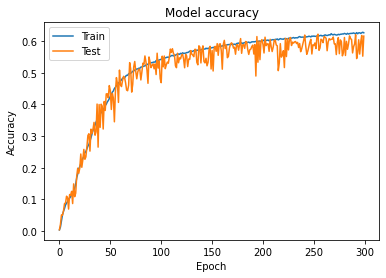

In [23]:
fig=plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
fig.savefig('F:/duochidu/gpu -300ep/picture/t2_acc.png')

In [29]:
 import pickle

In [30]:
# save:
f = open('F:/duochidu/gpu -300ep/acc-1/t2_RMSprop.history.pckl', 'wb')
pickle.dump(history.history, f)
f.close()

In [31]:
np.save("F:/duochidu/gpu -300ep/acc/t2_RMSprop_acc", DataFrame(history.history))

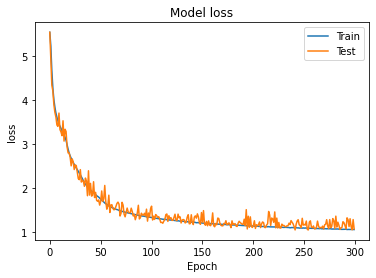

In [28]:
fig=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
fig.savefig('F:/duochidu/gpu -300ep/picture/t2_loss.png')

In [32]:
np.save("F:/duochidu/gpu -300ep/acc/t2_RMSprop_2_acc", DataFrame(history.history))

In [32]:
acc = np.load('./t2_RMSprop_acc.npy', allow_pickle=True)

FileNotFoundError: [Errno 2] No such file or directory: './t2_acc.npy'

In [56]:
acc

array({'val_loss': [5.54496307144165, 4.916727420043945, 4.583729460144043, 4.3809327880859374, 4.066187560272216, 4.1668072578430175, 3.677196701049805, 3.742490645599365, 3.5988448226928713, 3.4294253883361816, 3.238484475708008, 3.4289867279052735, 3.2092369644165037, 3.3721902374267576, 3.3053342613220216, 3.031005488586426, 3.0571389686584474, 3.169594649887085, 2.980557894897461, 2.6680186614990236, 3.0341073837280272, 2.6479224571228026, 2.697754420089722, 2.39688197555542, 2.359291311645508, 2.560070620727539, 2.3706968963623045, 2.849201570510864, 2.2937956413269043, 2.4556834533691405, 2.1413065826416013, 2.050368081665039, 2.0662762950897218, 2.847055797576904, 2.6168492065429687, 1.96558258934021, 2.0227196277618407, 1.926182774734497, 1.8611562782287598, 2.048766586303711, 2.0984982288360596, 2.1776974975585937, 2.021252017211914, 1.7449857675552367, 2.462117628479004, 1.9199477302551269, 1.7649652601242065, 1.7658215335845948, 1.6838521575927734, 1.8501562339782716, 1.830

In [53]:
type(acc)

numpy.ndarray

In [64]:
acc.tolist()['val_loss']

[5.54496307144165,
 4.916727420043945,
 4.583729460144043,
 4.3809327880859374,
 4.066187560272216,
 4.1668072578430175,
 3.677196701049805,
 3.742490645599365,
 3.5988448226928713,
 3.4294253883361816,
 3.238484475708008,
 3.4289867279052735,
 3.2092369644165037,
 3.3721902374267576,
 3.3053342613220216,
 3.031005488586426,
 3.0571389686584474,
 3.169594649887085,
 2.980557894897461,
 2.6680186614990236,
 3.0341073837280272,
 2.6479224571228026,
 2.697754420089722,
 2.39688197555542,
 2.359291311645508,
 2.560070620727539,
 2.3706968963623045,
 2.849201570510864,
 2.2937956413269043,
 2.4556834533691405,
 2.1413065826416013,
 2.050368081665039,
 2.0662762950897218,
 2.847055797576904,
 2.6168492065429687,
 1.96558258934021,
 2.0227196277618407,
 1.926182774734497,
 1.8611562782287598,
 2.048766586303711,
 2.0984982288360596,
 2.1776974975585937,
 2.021252017211914,
 1.7449857675552367,
 2.462117628479004,
 1.9199477302551269,
 1.7649652601242065,
 1.7658215335845948,
 1.68385215759277

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
model = load_model('./model/t2_RMSprop.h5')
model.evaluate(x_test_a,to_categorical(y_test, num_classes=256))

625/625 [==============================] - 3s 2ms/step - loss: 1.1433 - acc: 0.6030


[1.1433193683624268, 0.6030499935150146]

In [44]:
a

array({'val_loss': [5.54496307144165, 4.916727420043945, 4.583729460144043, 4.3809327880859374, 4.066187560272216, 4.1668072578430175, 3.677196701049805, 3.742490645599365, 3.5988448226928713, 3.4294253883361816, 3.238484475708008, 3.4289867279052735, 3.2092369644165037, 3.3721902374267576, 3.3053342613220216, 3.031005488586426, 3.0571389686584474, 3.169594649887085, 2.980557894897461, 2.6680186614990236, 3.0341073837280272, 2.6479224571228026, 2.697754420089722, 2.39688197555542, 2.359291311645508, 2.560070620727539, 2.3706968963623045, 2.849201570510864, 2.2937956413269043, 2.4556834533691405, 2.1413065826416013, 2.050368081665039, 2.0662762950897218, 2.847055797576904, 2.6168492065429687, 1.96558258934021, 2.0227196277618407, 1.926182774734497, 1.8611562782287598, 2.048766586303711, 2.0984982288360596, 2.1776974975585937, 2.021252017211914, 1.7449857675552367, 2.462117628479004, 1.9199477302551269, 1.7649652601242065, 1.7658215335845948, 1.6838521575927734, 1.8501562339782716, 1.830

In [45]:
plt.plot(a[0])

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [14]:
import h5py 
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.utils import to_categorical
# import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

In [15]:

labels = labels_1[0]#第一个字节
trace = x_train_a


# x_test = raw_traces[50000:, 75724: 76124]#test
# y_test = labels[9, 50000:]
# x_test = np.expand_dims(x_test, -1)
# # np.expand_dims(a, axis=-1)表示在最后一个位置添加数据

# trace = np.expand_dims(trace, -1)

print(trace.shape)


x =  np.expand_dims(trace[0], axis=0)#只用一条trace

x.shape

(90000, 150, 1)


(1, 150, 1)

In [16]:
preds = model.predict(x)
argmax = np.argmax(preds)#选取最大值 等于标签

output = model.output[:, argmax]#最后输出的结果

In [17]:
last_conv_layer = Model(inputs=model.input,
                           outputs=model.layers[9].output)#倒数第五层 需要的层数

In [18]:
last_conv_layer.output.shape

TensorShape([None, 150, 32])

In [19]:
from tensorflow.keras import backend as K
with tensorflow.GradientTape() as gtape:
    grads = gtape.gradient(output, last_conv_layer.output)[0]#求最后一层的输出和这一层的梯度的相关性
# #用于求y关于x 的导数（梯度）


NameError: name 'tensorflow' is not defined

In [20]:
from keras import backend as K
grads = K.gradients(output, last_conv_layer.output)[0]#求最后一层的输出和这一层的梯度的相关性
#用于求y关于x 的导数（梯度）

RuntimeError: tf.gradients is not supported when eager execution is enabled. Use tf.GradientTape instead.

In [26]:
import tensorflow as tf

In [27]:
from keras import backend as K
grads = tf.GradientTape(output, last_conv_layer.output)[0]#求最后一层的输出和这一层的梯度的相关性
# #用于求y关于x 的导数（梯度）

TypeError: 'GradientTape' object is not subscriptable

In [24]:
from keras import backend as K
grads = K.tf.GradientTape(output, last_conv_layer.output)[0]#求最后一层的输出和这一层的梯度的相关性
# #用于求y关于x 的导数（梯度）

TypeError: 'GradientTape' object is not subscriptable

In [ ]:
pooled_grads = K.mean(grads, axis=(0, 1, 2))#对三个维度同时求均值

In [ ]:
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

In [ ]:
pooled_grads_value, conv_layer_output_value = iterate([x])

In [ ]:
conv_layer_output_value.shape

In [ ]:
for i in range(32):#512个神经元 （这一层的）
    conv_layer_output_value[:, i] *= pooled_grads_value#得到每个神经元的权重

In [ ]:
conv_layer_output_value

In [18]:
conv_layer_output_value = abs(conv_layer_output_value)

In [19]:
heatmap = np.mean(conv_layer_output_value, axis=-1)#求这一层输出最后一个维度的均值
heatmap = np.maximum(heatmap, 0)#用于逐元素比较两个array的大小。
heatmap /= np.max(heatmap)#c /= a 等效于 c = c / a

In [20]:
conv_layer_output_value.shape

(150, 32)

In [21]:
conv_layer_output_value

array([[0.0000000e+00, 0.0000000e+00, 6.5514010e-05, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.8047346e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 3.4904006e-04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

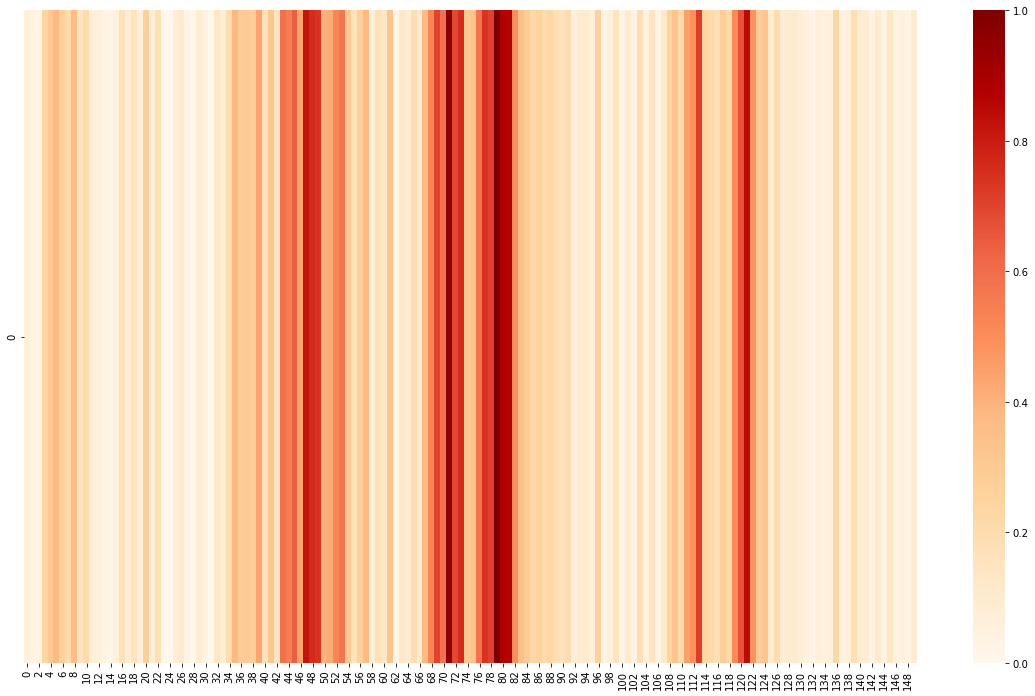

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize = (20, 12))
a = np.random.uniform(0, 1, size=(10, 10))
#功能：从一个均匀分布[low,high)中随机采样, 
#(low,high,size),low: 采样下界, high: 采样上界, size: 输出样本数目
sns.heatmap(heatmap.reshape(150,1).T, cmap='OrRd')
plt.show()

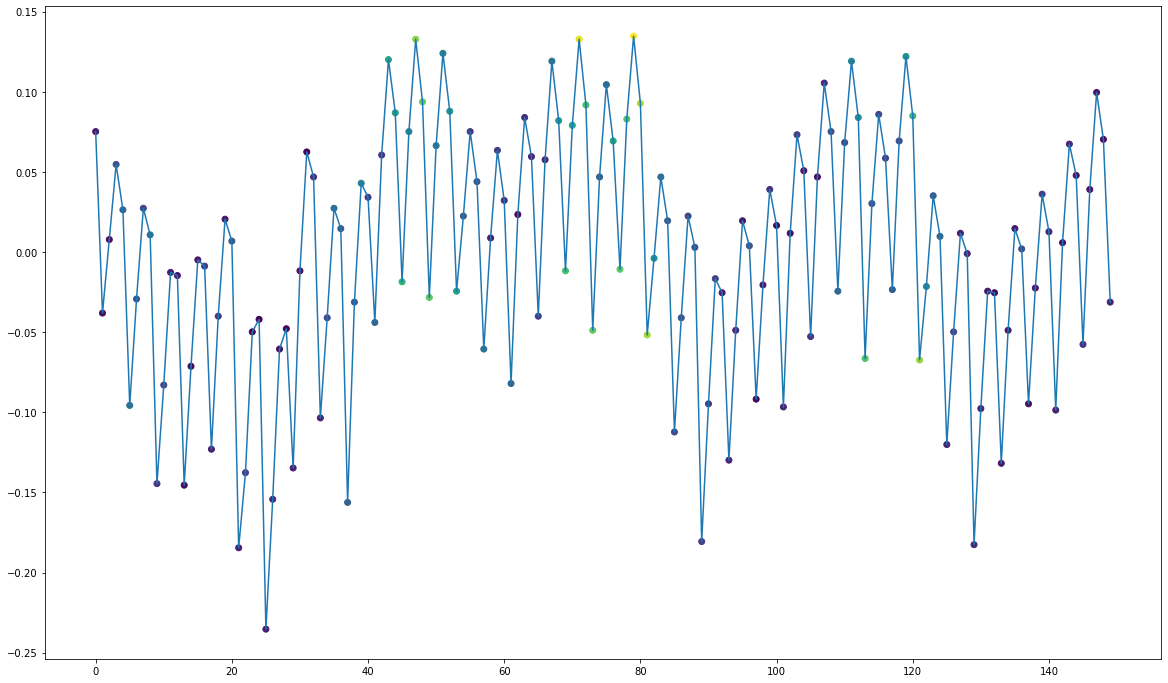

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 12))
x = np.arange(150)
y = trace[0].reshape(150,)
t = heatmap.reshape(150,)


plt.plot(trace[0])

plt.scatter(x, y, c=t)
plt.colorbar
plt.show()

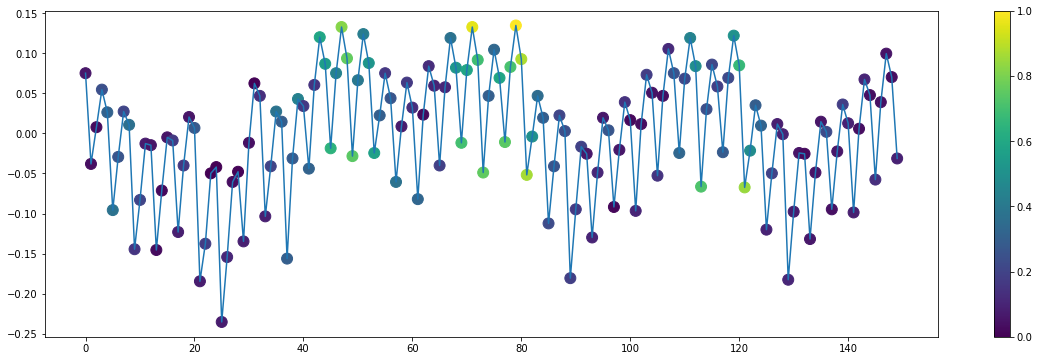

In [24]:
import matplotlib.ticker as ticker

plt.figure(figsize = (20, 6))

x = np.arange(150)
y = trace[0].reshape(150,)
t = heatmap.reshape(150,)


plt.scatter(x, y, c=t,s=120)

plt.colorbar()

plt.plot(trace[0])

ticker.MaxNLocator(nbins=6)
plt.show()


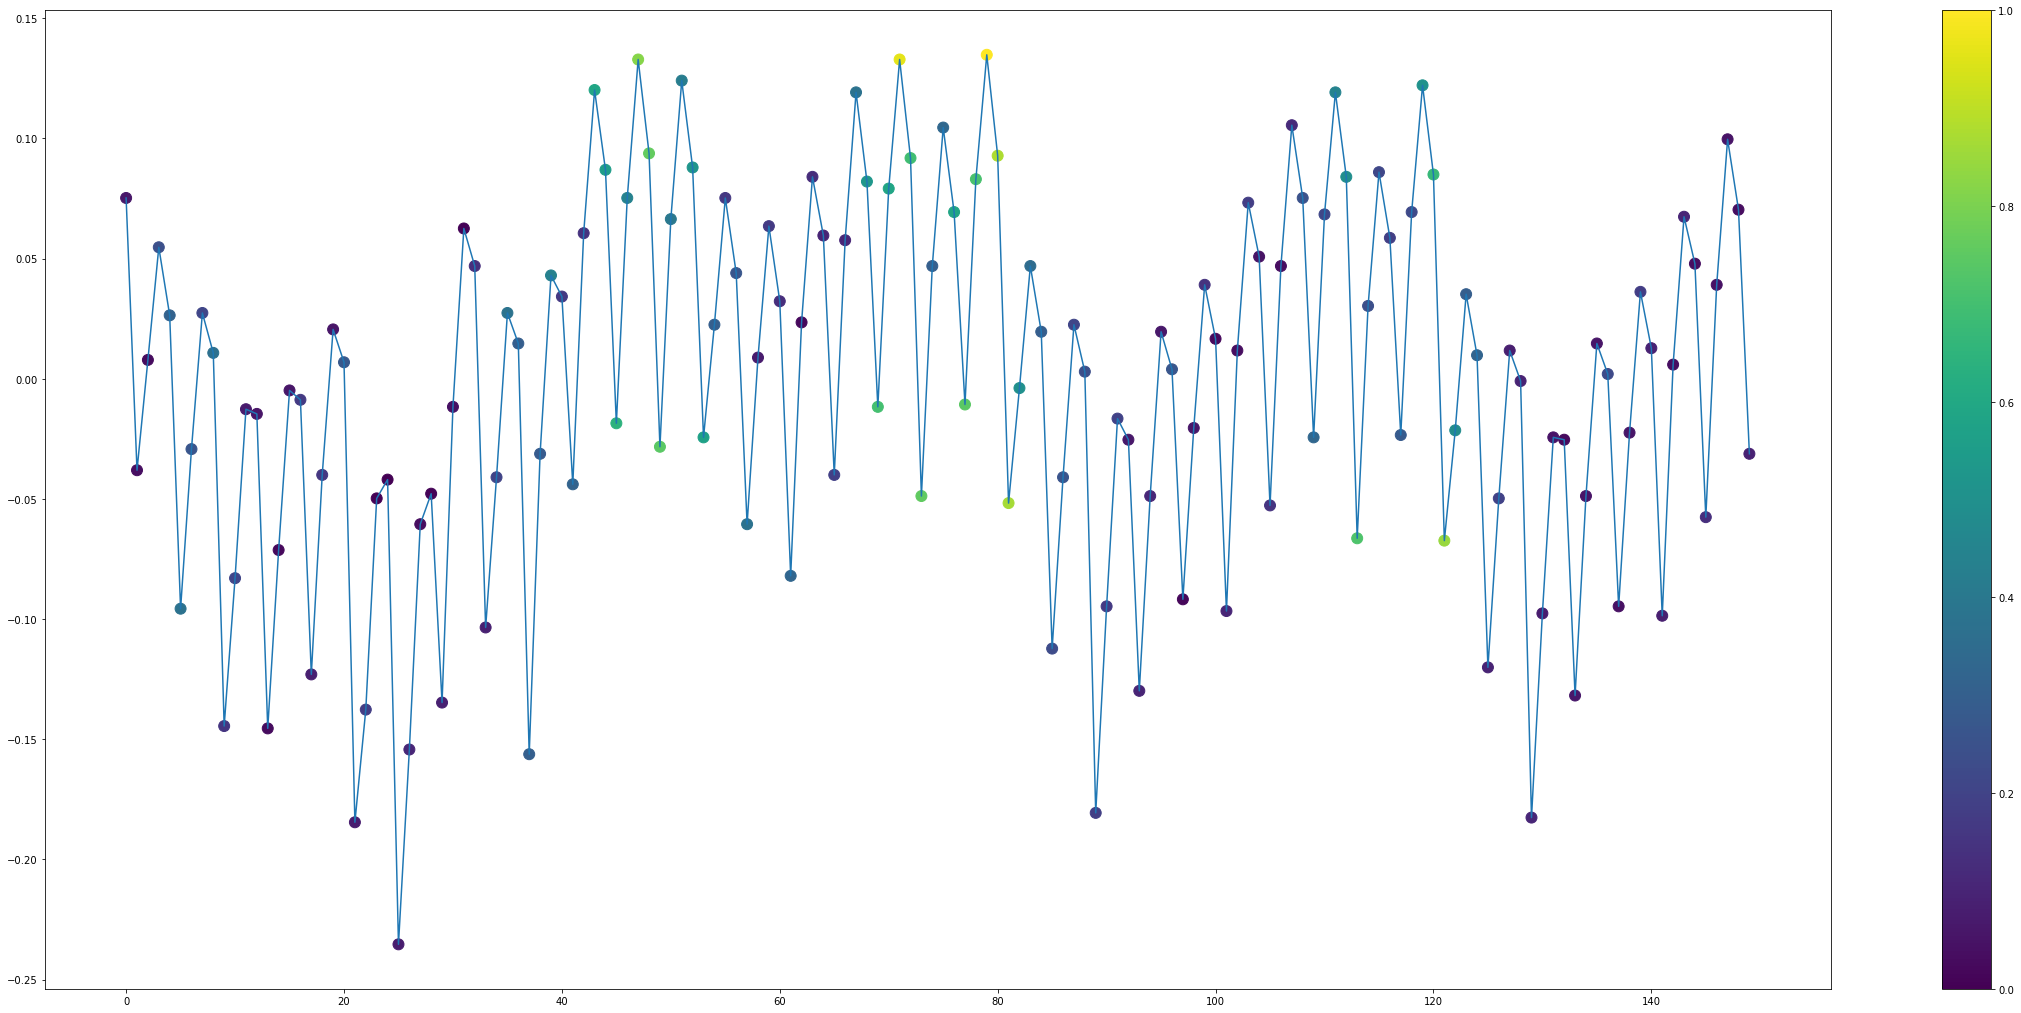

In [29]:
import matplotlib.ticker as ticker

plt.figure(figsize = (40, 18))

x = np.arange(150)
y = trace[0].reshape(150,)
t = heatmap.reshape(150,)


plt.scatter(x, y, c=t,s=120)

plt.colorbar()

plt.plot(trace[0])
 

ticker.MaxNLocator(nbins=6)
plt.show()
